In [1]:
# ✅ Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter

In [49]:
# Step 1: Load Dataset
df=pd.read_csv('credit_card.csv')

print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

Dataset Shape: (284807, 31)
First 5 rows:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.

In [50]:
# Step 2: Basic Info & Missing Values Check
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


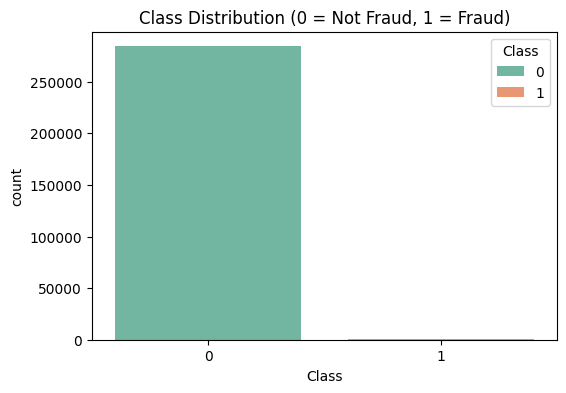

In [51]:
# Step 3: Target Distribution (Imbalance Check)
plt.figure(figsize=(6,4))
sns.countplot(data=df,x='Class',palette='Set2',hue='Class')
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.show()

In [52]:
fraud_count=df['Class'].value_counts()
print("\nClass Distribution:\n", fraud_count)
print(f"Fraudulent transactions: {fraud_count[1]/fraud_count[0]*100:.4f}% of normal transactions")


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent transactions: 0.1730% of normal transactions


In [53]:
# Step 4: Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e

In [54]:
# Step 5: Correlation Heatmap
import plotly.express as px

fig = px.imshow(df.corr(),
                text_auto=".2f",
                color_continuous_scale="RdBu_r",
                title="Interactive Feature Correlation Heatmap",
                width=900,   # width in pixels
                height=700)  # height in pixels

fig.show()

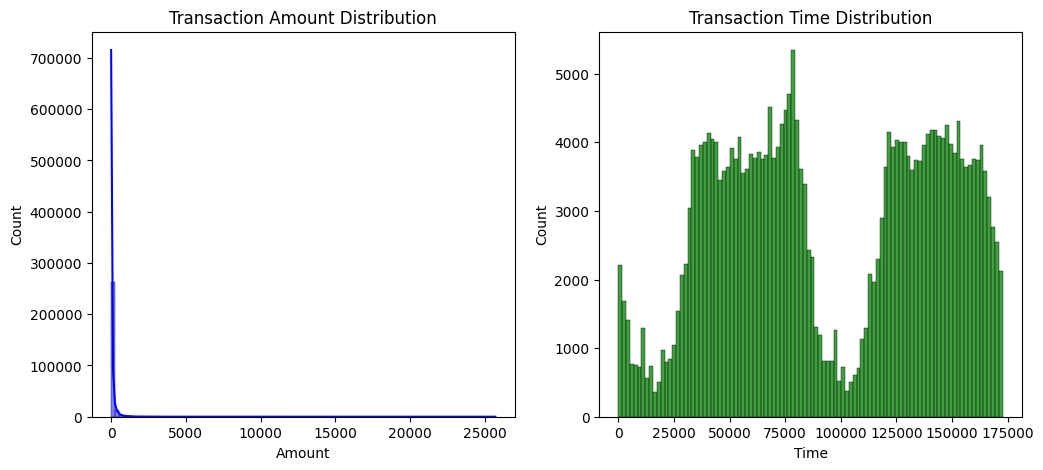

In [55]:
# Step 6: Feature Distribution (Amount & Time)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Amount"], bins=100, kde=True, color="blue")
plt.title("Transaction Amount Distribution")

plt.subplot(1,2,2)
sns.histplot(df["Time"], bins=100, kde=False, color="green")
plt.title("Transaction Time Distribution")

plt.show()

In [56]:
# Step 7: Data Cleaning
# Check duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows. New shape: {df.shape}")


Duplicate rows: 1081
Removed 1081 duplicate rows. New shape: (283726, 31)


In [57]:
# Step 8: Train-Test Split
X=df.drop('Class',axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (226980, 30)  Test shape: (56746, 30)


In [58]:
# Step 9: Feature Scaling (after split, fit only on train)
scaler=StandardScaler()

# Fit only on training data
X_train[['Time','Amount']]=scaler.fit_transform(X_train[['Time','Amount']])

# Use same transformation on test data
X_test[['Time','Amount']]=scaler.transform(X_test[['Time','Amount']])

print("\nScaled Training Data:\n", X_train[["Time", "Amount"]].head())


Scaled Training Data:
             Time    Amount
226238  1.045499 -0.229434
134253 -0.298690 -0.331197
186465  0.678397 -0.298809
149493 -0.074929 -0.289247
18461  -1.376728 -0.261985


In [59]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
# Step 10: Handling Imbalance (SMOTEENN)
print("\nBefore SMOTEENN:", Counter(y_train))

from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

print("After SMOTEENN:", Counter(y_train_res))


Before SMOTE: Counter({0: 226602, 1: 378})
After SMOTEENN: Counter({1: 226602, 0: 226271})


In [61]:
X_train_res.to_csv("X_train_resampled.csv", index=False)
y_train_res.to_csv("y_train_resampled.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [62]:
# Final Notes
print("\n✅ Task 1 Completed: Data cleaned, split, scaled (no leakage), and balanced with SMOTE.")


✅ Task 1 Completed: Data cleaned, split, scaled (no leakage), and balanced with SMOTE.
